# **22BIO201 Intelligence of Biological Systems 1**
**Lab Sheet 3**

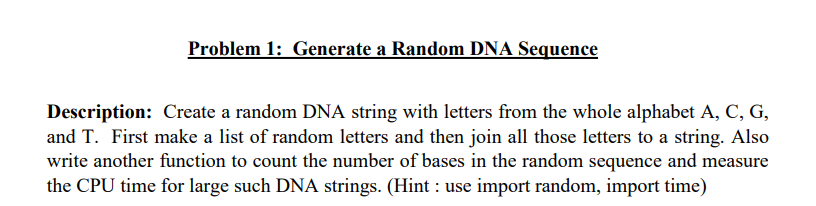

In [10]:
import random
import time


n = int(input("Enter the size of the random DNA string: "))

def rndDNA(n):
  bases = ["A", "G", "C", "T"]
  dna = "".join([random.choice(bases) for i in range(n)])
  return dna

print(rndDNA(n))

Enter the size of the random DNA string: 25
TTTGCCATTCCTCAAGTCTAGCCAC


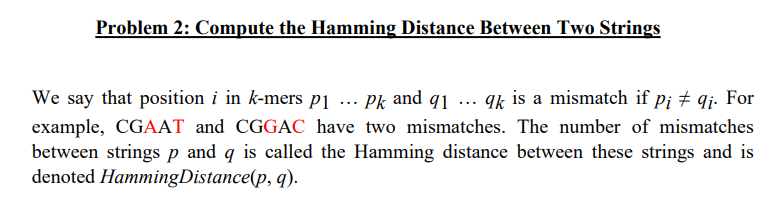

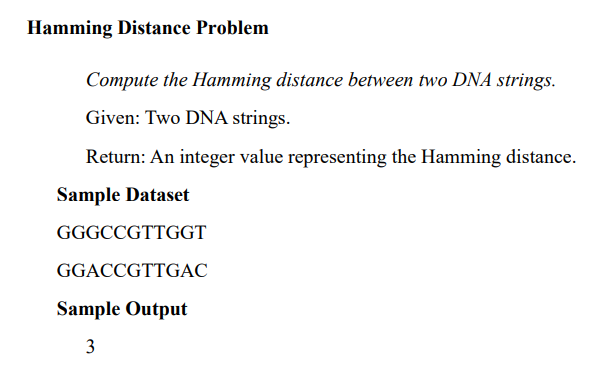

In [11]:
def HammingDistance(text1, text2):
  d=0
  for i in range(len(text1)):
    if text1[i] != text2[i]:
      d+=1
  return d

In [12]:
HammingDistance("GGGCCGTTGGT", "GGACCGTTGAC")

3

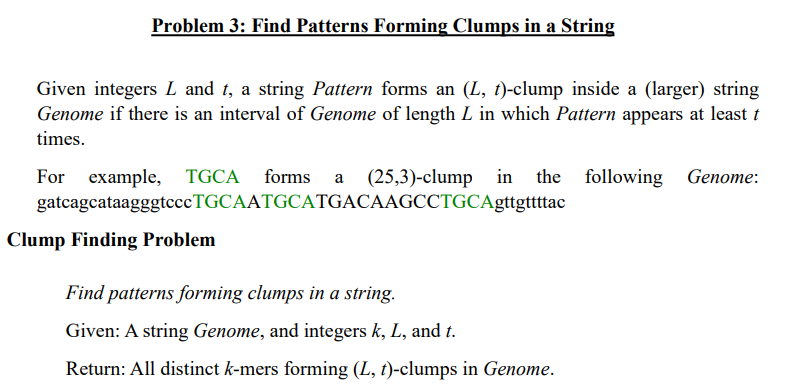

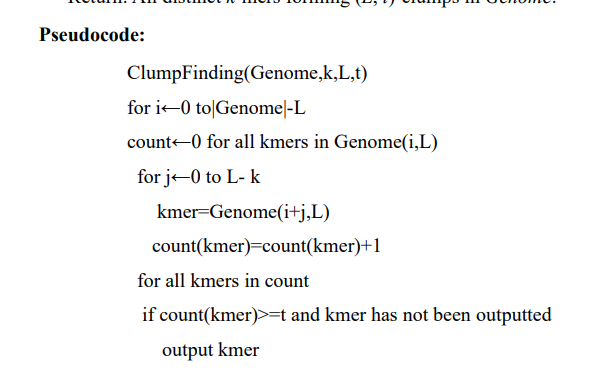

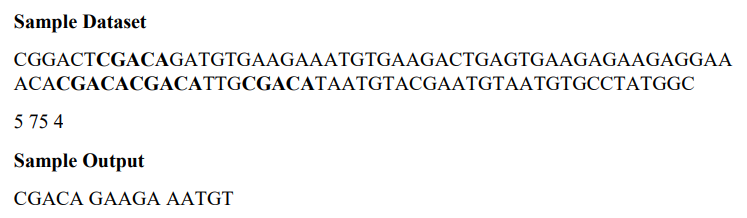

In [13]:
def count2(dna, pattern): # This Function does the same stuff as count() but more efficiently
    return [dna[i:i+len(pattern)] for i in range(len(dna)-len(pattern))].count(pattern)

def Occurrences2(dna, pattern):
    return [i for i in range(len(dna)-len(pattern)) if dna[i:i+len(pattern)] == pattern]

def frequentwords2(genome, k): # This is also a compacted Function of frequentwords() which is more efficient using List and Dictionary comprehension, Lambda Functions
  return {kmer: genome.count(kmer) for kmer in sorted(set([genome[i:i+k] for i in range(len(genome)-k)]), key=lambda x: genome.count(x), reverse=True)}

In [14]:
def clumpFinding(genome, k, L, t):
  windows = [genome[i:i+L] for i in range(len(genome)-L)]
  clumps = []
  for i in windows:
    clump = frequentwords2(i, k)
    clump = [i for i in clump if clump[i]>=4]
    clumps.extend(clump)
  return list(set(clumps))

In [15]:
genome = "CGGACTCGACAGATGTGAAGAAATGTGAAGACTGAGTGAAGAGAAGAGGAAACACGACACGACATTGCGACATAATGTACGAATGTAATGTGCCTATGGC"
print(clumpFinding(genome, 5, 75, 4))

['GAAGA', 'AATGT', 'CGACA']


In [16]:
def clumpFinding2(genome, k, L, t):
  return list(set([kmer for window in [genome[i:i+L] for i in range(len(genome)-L)] for kmer in sorted(set([window[i:i+k] for i in range(len(window)-k)])) if window.count(kmer) >= t]))

In [17]:
genome = "CGGACTCGACAGATGTGAAGAAATGTGAAGACTGAGTGAAGAGAAGAGGAAACACGACACGACATTGCGACATAATGTACGAATGTAATGTGCCTATGGC"
print(clumpFinding2(genome, 5, 75, 4))

['GAAGA', 'AATGT', 'CGACA']


In [24]:
def skew(genome):
  base_count = {"G":0, "C":0}
  skewlist=[]
  for i in genome:
    if i in base_count:
      base_count[i]+=1
    skewlist.append(base_count["G"]-base_count["C"])
  return [i+1 for i, val in enumerate(skewlist) if val == min(skewlist)]

In [25]:
genome = "CCTATCGGTGGATTAGCATGTCCCTGTACGTTTCGCCGCGAACTAGTTCACACGGCTTGATGGCAAATGGTTTTTCCGGCGACCGTAATCGTCCACCGAG"
print(skew(genome))

[53, 97]
